# Homework 8

## Part I
Read the the following pages from *Text Based Network Industries and Endogenous Product Differentiation* by Hoberg and Phillips; *Journal of Political Economy* 2016. 

- pg 1423- end of first paragraph on 1425
- pg 1427- paragraph starting with 'Although it is convenient to use...' - 

This paper uses clustering (which we will learn about next week) to develop industry classifications. 

The paper is available on Canvas under 'Library Course Reserves'.

<font color = 'blue'> <font size = 4> 
**Question 1:**  </font> What did you find most interesting in your reading?
 

    
<font color = 'blue'> <font size = 4>
**Question 2:** </font> In your own words, what are the limitations of more traditional industry classification measures?

**Answers to Q1 and Q2 Above:**

Q1. In order to identify and classify firms, the paper suggested using a business description of the company's 10-k document as a historical dataset and group by products that are sold based on the customers' preferences by assigning a spatial location based on the product description.

Q2. 


First, the original methods of classifying firms, SIC and NAICS, neither takes into consideration of reclassification as time is revolving and the market is changing. \
Second, SIC and NAICS can't easily tailor towards innovations within the new product market. \
Third, SIC and NAICS assumes a relation between three firms, where one of them holds between the two firms. This might not always be the case in a real life market, because the two firms that are rivals to a third firm might not be rivals. \
Finally, the original method doesn't provide a metric of similarity both within and across industries. 


----------

## Part II

In this part, you will forecast Home Depot's operating cash flows and estimate a confidence interval for your predictions. Follow the instructions below.

### Clean the Data

Review the code I use below to practice your coding skills and to become familiar with the data.

In [1]:
# database tools
import pandas as pd 
import numpy as np

# import graphing tools
import seaborn as sns
import matplotlib.pyplot as plt

# import regression library 
import statsmodels.formula.api as smf

# import forecasting library-- new import today
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#import missing values
from numpy import NaN, nan, NAN

# format floats to have thousands separators and two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# import quarterly data from Compustat
quarterly = pd.read_csv('quarterlydata.csv')

quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580254 entries, 0 to 580253
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gvkey     580254 non-null  int64  
 1   datadate  580254 non-null  int64  
 2   fyearq    580254 non-null  int64  
 3   fqtr      579936 non-null  float64
 4   fyr       580254 non-null  int64  
 5   indfmt    580254 non-null  object 
 6   consol    580254 non-null  object 
 7   popsrc    580254 non-null  object 
 8   datafmt   580254 non-null  object 
 9   tic       579826 non-null  object 
 10  conm      580254 non-null  object 
 11  curcdq    580254 non-null  object 
 12  datacqtr  579480 non-null  object 
 13  datafqtr  579862 non-null  object 
 14  niq       418727 non-null  float64
 15  piq       417112 non-null  float64
 16  oancfy    393563 non-null  float64
 17  oiadpy    411088 non-null  float64
 18  oibdpy    387825 non-null  float64
 19  cik       418385 non-null  float64
 20  cost

In [3]:
# import annual data from compustat
annual = pd.read_csv('annualdata.csv')

annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152881 entries, 0 to 152880
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gvkey     152881 non-null  int64  
 1   datadate  152881 non-null  int64  
 2   fyear     152711 non-null  float64
 3   indfmt    152881 non-null  object 
 4   consol    152881 non-null  object 
 5   popsrc    152881 non-null  object 
 6   datafmt   152881 non-null  object 
 7   tic       152773 non-null  object 
 8   conm      152881 non-null  object 
 9   curcd     152711 non-null  object 
 10  fyr       152711 non-null  float64
 11  oancf     102051 non-null  float64
 12  oiadp     102520 non-null  float64
 13  oibdp     99561 non-null   float64
 14  opincar   1518 non-null    float64
 15  cik       114042 non-null  float64
 16  costat    152881 non-null  object 
 17  fic       152881 non-null  object 
dtypes: float64(7), int64(2), object(9)
memory usage: 21.0+ MB


In [4]:
# merge quarterly and annual data
data = quarterly.merge(annual, on = ['gvkey', 'datadate'], how = 'outer')

data.head()

,gvkey,datadate,fyearq,fqtr,fyr_x,indfmt_x,consol_x,popsrc_x,datafmt_x,tic_x,...,conm_y,curcd,fyr_y,oancf,oiadp,oibdp,opincar,cik_y,costat_y,fic
0,1004,20100228,"2,009.00",3.00,5.00,INDL,C,D,STD,AIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,20100531,"2,009.00",4.00,5.00,INDL,C,D,STD,AIR,...,AAR CORP,USD,5.00,153.16,95.42,134.34,NaN,"1,750.00",A,USA
2,1004,20100831,"2,010.00",1.00,5.00,INDL,C,D,STD,AIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,20101130,"2,010.00",2.00,5.00,INDL,C,D,STD,AIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,20110228,"2,010.00",3.00,5.00,INDL,C,D,STD,AIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'blue'> <font size = 4>
    
**Question 3**
    
</font>

Using your understanding of the data and the assignment, why do you think I used an outer merge? What does an outer merge accomplish? 
    
- If we use "how = 'merge', that would default to an inner merge and make the data overlap. Thus, we need to specify outermerge. basically we need both quarterly and annual data
- we used an outermerge to combine all the dataframes that have null values into one, in order to analyze effeciently.
    

**Q3 Answer**

In [5]:
# US currency
data = data[data['curcdq'] == 'USD']

In [6]:
# some duplicate columns from merge
data = data[['gvkey', 'datadate', 'fyearq', 'fqtr', 'tic_x', 'conm_x', 'datacqtr',
       'datafqtr', 'niq', 'piq', 'oancfy', 'oiadpy',  'cik_x', 'gind', 'idbflag', 
             'naics', 'ipodate', 'fyear', 'oancf', 'oiadp', 'fic']]

In [7]:
# rename
data.columns = ['gvkey', 'datadate', 'fyearq', 'fqtr', 'tic', 'company',
'datacqtr', 'datafqtr', 'netincome_q', 'pretaxinc_q', 'opercf_fy', 'operinc_q',
'cik', 'industry', 'intl_dom', 'naics', 'ipodate', 'fyear',
 'opercf_annual', 'operinc_annual', 'country']

<font color = 'red'> <font size = 4>
**Task 1**

Annotate the cleaning loop below.

In [8]:
# assign list called 'fix' with columns: 'fyearq', 'fqtr','cik', 'industry', 'naics', 'ipodate', 'fyear'
fix = ['fyearq', 'fqtr','cik', 'industry', 'naics', 'ipodate', 'fyear']

In [9]:
# when a value from the 'fix' list goes inside the loop, convert to string and then drop the two digits then print
for i in fix:
    data[i] = data[i].astype('str')

    data[i] = data[i].str[:-2]

    print(data[i].head())

0    2009
1    2009
2    2010
3    2010
4    2010
Name: fyearq, dtype: object
0    3
1    4
2    1
3    2
4    3
Name: fqtr, dtype: object
0    1750
1    1750
2    1750
3    1750
4    1750
Name: cik, dtype: object
0    201010
1    201010
2    201010
3    201010
4    201010
Name: industry, dtype: object
0    423860
1    423860
2    423860
3    423860
4    423860
Name: naics, dtype: object
0    19880101
1    19880101
2    19880101
3    19880101
4    19880101
Name: ipodate, dtype: object
0       n
1    2009
2       n
3       n
4       n
Name: fyear, dtype: object


In [10]:
# convert 'datadate' column's format into %Y%m%d
data['datadate'] = pd.to_datetime(data['datadate'], format = '%Y%m%d')
# convert gvkey as string
data['gvkey'] = data['gvkey'].astype('str')
# check result
data.head()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,operinc_q,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country
0,1004,2010-02-28,2009,3,AIR,AAR CORP,2010Q1,2009Q3,9.91,15.93,...,72.28,1750,201010,D,423860,19880101,n,NaN,NaN,NaN
1,1004,2010-05-31,2009,4,AIR,AAR CORP,2010Q2,2009Q4,11.20,18.74,...,98.85,1750,201010,D,423860,19880101,2009,153.16,95.42,USA
2,1004,2010-08-31,2010,1,AIR,AAR CORP,2010Q3,2010Q1,13.67,21.61,...,28.76,1750,201010,D,423860,19880101,n,NaN,NaN,NaN
3,1004,2010-11-30,2010,2,AIR,AAR CORP,2010Q4,2010Q2,16.81,25.29,...,59.02,1750,201010,D,423860,19880101,n,NaN,NaN,NaN
4,1004,2011-02-28,2010,3,AIR,AAR CORP,2011Q1,2010Q3,17.92,27.17,...,95.28,1750,201010,D,423860,19880101,n,NaN,NaN,NaN


<font color = 'red'> <font size = 4>  
**Task 2**
    
</font> </font>
    
Quarterly operating cash flows are cumulative from the beginning of the year. Meaning the operating cash flows reported for Q2 are the operating cash flows from the beginning of the year through the end of Q2 and the operating cash flows reported for Q3 are the total operating cash flows from the beginning of the year through the end of Q3. 
    
Write a code below to create a new column that reports quarterly operating cash flows as a noncumulative number- i.e. the value for Q2 is the operating cash flows from the end of Q1 to the end of Q2 and the operating cash flows reported for Q3 is the operating cash flows from the end of Q2 to the end of Q3. 

In [11]:
# we want to group by the company identifier 'gvkey' and the reported year 'fyearq'  
data['non_cumulative'] = np.where(data['fqtr']=='1', data['operinc_q'], data.groupby(['gvkey','fyearq' ])['operinc_q'].diff())

In [12]:
data

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
0,1004,2010-02-28,2009,3,AIR,AAR CORP,2010Q1,2009Q3,9.91,15.93,...,1750,201010,D,423860,19880101,n,NaN,NaN,NaN,NaN
1,1004,2010-05-31,2009,4,AIR,AAR CORP,2010Q2,2009Q4,11.20,18.74,...,1750,201010,D,423860,19880101,2009,153.16,95.42,USA,26.57
2,1004,2010-08-31,2010,1,AIR,AAR CORP,2010Q3,2010Q1,13.67,21.61,...,1750,201010,D,423860,19880101,n,NaN,NaN,NaN,28.76
3,1004,2010-11-30,2010,2,AIR,AAR CORP,2010Q4,2010Q2,16.81,25.29,...,1750,201010,D,423860,19880101,n,NaN,NaN,NaN,30.27
4,1004,2011-02-28,2010,3,AIR,AAR CORP,2011Q1,2010Q3,17.92,27.17,...,1750,201010,D,423860,19880101,n,NaN,NaN,NaN,36.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593884,353444,2022-06-30,2022,2,HLN,HALEON PLC,2022Q2,2022Q2,628.00,"1,050.00",...,n,303020,B,325412,20220718,n,NaN,NaN,NaN,NaN
593885,353945,2021-03-31,2021,1,ACLLY,ACCELLERON INDUSTRIES AG,2021Q1,2021Q1,NaN,NaN,...,1948862,201040,B,335312,20221003,n,NaN,NaN,NaN,NaN
593886,353945,2021-06-30,2021,2,ACLLY,ACCELLERON INDUSTRIES AG,2021Q2,2021Q2,NaN,NaN,...,1948862,201040,B,335312,20221003,n,NaN,NaN,NaN,NaN
593887,353945,2021-09-30,2021,3,ACLLY,ACCELLERON INDUSTRIES AG,2021Q3,2021Q3,NaN,NaN,...,1948862,201040,B,335312,20221003,n,NaN,NaN,NaN,NaN


<font color = 'red'> <font size = 4> 
**Task 3**
    
</font> </font>

Use exponential smoothing to predict Home Depot's (HOME DEPOT INC) quarterly operating cash flows. **Use all but the last 4 quarters to build your model.**

Note- you will need to remove the first observation that has a missing value for quarterly operating cash flows for your model to work.

In [13]:
# subset home depot
data2 = data[data['company'] == 'HOME DEPOT INC']
data2.head()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
25132,5680,2010-01-31,2009,4,HD,HOME DEPOT INC,2009Q4,2009Q4,342.00,406.00,...,354950,255040,B,444110,n,2009,"5,125.00","4,949.00",USA,NaN
25133,5680,2010-04-30,2010,1,HD,HOME DEPOT INC,2010Q1,2010Q1,725.00,"1,116.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,305.00"
25134,5680,2010-07-31,2010,2,HD,HOME DEPOT INC,2010Q2,2010Q2,"1,192.00","1,901.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"2,049.00"
25135,5680,2010-10-31,2010,3,HD,HOME DEPOT INC,2010Q3,2010Q3,834.00,"1,306.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,448.00"
25136,5680,2011-01-31,2010,4,HD,HOME DEPOT INC,2010Q4,2010Q4,587.00,950.00,...,354950,255040,B,444110,n,2010,"4,585.00","5,839.00",USA,"1,037.00"


In [14]:
# drop first row (observation) that has a missing value for quarterly operating cash flows
data2_resetindex = data2.reset_index(drop=True)
data3 = data2_resetindex.iloc[1: , :]
data3.head()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
1,5680,2010-04-30,2010,1,HD,HOME DEPOT INC,2010Q1,2010Q1,725.00,"1,116.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,305.00"
2,5680,2010-07-31,2010,2,HD,HOME DEPOT INC,2010Q2,2010Q2,"1,192.00","1,901.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"2,049.00"
3,5680,2010-10-31,2010,3,HD,HOME DEPOT INC,2010Q3,2010Q3,834.00,"1,306.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,448.00"
4,5680,2011-01-31,2010,4,HD,HOME DEPOT INC,2010Q4,2010Q4,587.00,950.00,...,354950,255040,B,444110,n,2010,"4,585.00","5,839.00",USA,"1,037.00"
5,5680,2011-04-30,2011,1,HD,HOME DEPOT INC,2011Q1,2011Q1,812.00,"1,283.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,422.00"


In [15]:
data3.tail()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
46,5680,2021-07-31,2021,2,HD,HOME DEPOT INC,2021Q2,2021Q2,"4,807.00","6,318.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"6,663.00"
47,5680,2021-10-31,2021,3,HD,HOME DEPOT INC,2021Q3,2021Q3,"4,129.00","5,469.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"5,830.00"
48,5680,2022-01-31,2021,4,HD,HOME DEPOT INC,2021Q4,2021Q4,"3,352.00","4,502.00",...,354950,255040,B,444110,n,2021,"16,571.00","23,302.00",USA,"4,950.00"
49,5680,2022-04-30,2022,1,HD,HOME DEPOT INC,2022Q1,2022Q1,"4,231.00","5,560.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"5,929.00"
50,5680,2022-07-31,2022,2,HD,HOME DEPOT INC,2022Q2,2022Q2,"5,173.00","6,831.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"7,210.00"


In [16]:
# Use all but the last 4 quarters to build your model 

data4 = data3.iloc[0:-4]
data4.tail()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
42,5680,2020-07-31,2020,2,HD,HOME DEPOT INC,2020Q2,2020Q2,"4,332.00","5,730.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"6,654.00"
43,5680,2020-10-31,2020,3,HD,HOME DEPOT INC,2020Q3,2020Q3,"3,432.00","4,523.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"5,265.00"
44,5680,2021-01-31,2020,4,HD,HOME DEPOT INC,2020Q4,2020Q4,"2,857.00","3,756.00",...,354950,255040,B,444110,n,2020,"18,839.00","20,626.00",USA,"4,567.00"
45,5680,2021-04-30,2021,1,HD,HOME DEPOT INC,2021Q1,2021Q1,"4,145.00","5,448.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"5,859.00"
46,5680,2021-07-31,2021,2,HD,HOME DEPOT INC,2021Q2,2021Q2,"4,807.00","6,318.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"6,663.00"


In [17]:
data4.head()

,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,cik,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative
1,5680,2010-04-30,2010,1,HD,HOME DEPOT INC,2010Q1,2010Q1,725.00,"1,116.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,305.00"
2,5680,2010-07-31,2010,2,HD,HOME DEPOT INC,2010Q2,2010Q2,"1,192.00","1,901.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"2,049.00"
3,5680,2010-10-31,2010,3,HD,HOME DEPOT INC,2010Q3,2010Q3,834.00,"1,306.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,448.00"
4,5680,2011-01-31,2010,4,HD,HOME DEPOT INC,2010Q4,2010Q4,587.00,950.00,...,354950,255040,B,444110,n,2010,"4,585.00","5,839.00",USA,"1,037.00"
5,5680,2011-04-30,2011,1,HD,HOME DEPOT INC,2011Q1,2011Q1,812.00,"1,283.00",...,354950,255040,B,444110,n,n,NaN,NaN,NaN,"1,422.00"


In [18]:
# use the shortened df that you dropped the last 4 and save it to new df -> ses model
# run model on the last 4 dropped observations we observe

model4 = ExponentialSmoothing(data4['non_cumulative'], seasonal_periods = 4, trend = 'add', seasonal = 'mul').fit()
model4.summary()

/Users/silvialee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,non_cumulative,No. Observations:,46
Model:,ExponentialSmoothing,SSE,5009715.321
Optimized:,True,AIC,549.519
Trend:,Additive,BIC,564.149
Seasonal:,Multiplicative,AICC,555.805
Seasonal Periods:,4,Date:,"Mon, 14 Nov 2022"
Box-Cox:,False,Time:,05:47:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6006943,alpha,True
smoothing_trend,0.0113577,beta,True


<font color = 'blue'> <font size = 4>
    
**Question 4**
    
</font> </font>
    
Interpret and explain the values provided for the four 'initial_seasons'.

**Question 4 Answer**

Depending on the seasonality (the different quarters) of the data, season 0 (quarter 1) has 0.43, season 1 (quarter 2) has 0.67, season 2 (quarter 3) has 0.48, season 3 (quarter 4) has 0.35 of permanent shifts.


<font color = 'red'> <font size = 4>
**Task 4**
    
</font> </font>

Predict quarterly operating cash flows through Home Depot's second quarter of fiscal year 2022. Use your model to predict both in sample and out of sample quarterly operating cash flows. 

In [19]:
# use shortened df 'data4' and predict quarterly operating cash flows
# in sample forecast
data4['tes_forecast'] = model4.fittedvalues
data4.head()

/var/folders/xp/sw_vjs8s7pdcq6bfz9y7pw640000gn/T/ipykernel_23466/3693685158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['tes_forecast'] = model4.fittedvalues


,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,industry,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative,tes_forecast
1,5680,2010-04-30,2010,1,HD,HOME DEPOT INC,2010Q1,2010Q1,725.00,"1,116.00",...,255040,B,444110,n,n,NaN,NaN,NaN,"1,305.00","1,308.80"
2,5680,2010-07-31,2010,2,HD,HOME DEPOT INC,2010Q2,2010Q2,"1,192.00","1,901.00",...,255040,B,444110,n,n,NaN,NaN,NaN,"2,049.00","2,088.31"
3,5680,2010-10-31,2010,3,HD,HOME DEPOT INC,2010Q3,2010Q3,834.00,"1,306.00",...,255040,B,444110,n,n,NaN,NaN,NaN,"1,448.00","1,547.16"
4,5680,2011-01-31,2010,4,HD,HOME DEPOT INC,2010Q4,2010Q4,587.00,950.00,...,255040,B,444110,n,2010,"4,585.00","5,839.00",USA,"1,037.00","1,130.24"
5,5680,2011-04-30,2011,1,HD,HOME DEPOT INC,2011Q1,2011Q1,812.00,"1,283.00",...,255040,B,444110,n,n,NaN,NaN,NaN,"1,422.00","1,361.21"


In [20]:
# out of sample forecast
model4.forecast(4)

47   5,497.98
48   4,763.70
49   5,602.87
50   7,538.07
dtype: float64

<font color = 'red'> <font size = 4>
**Task 5**
    
</font> </font>

Plot your predicted and actual values on the same graph. Use a lineplot that has dots at each point, like a combination line and scatterplot.

Text(0.5, 0, 'Quarters Passed')

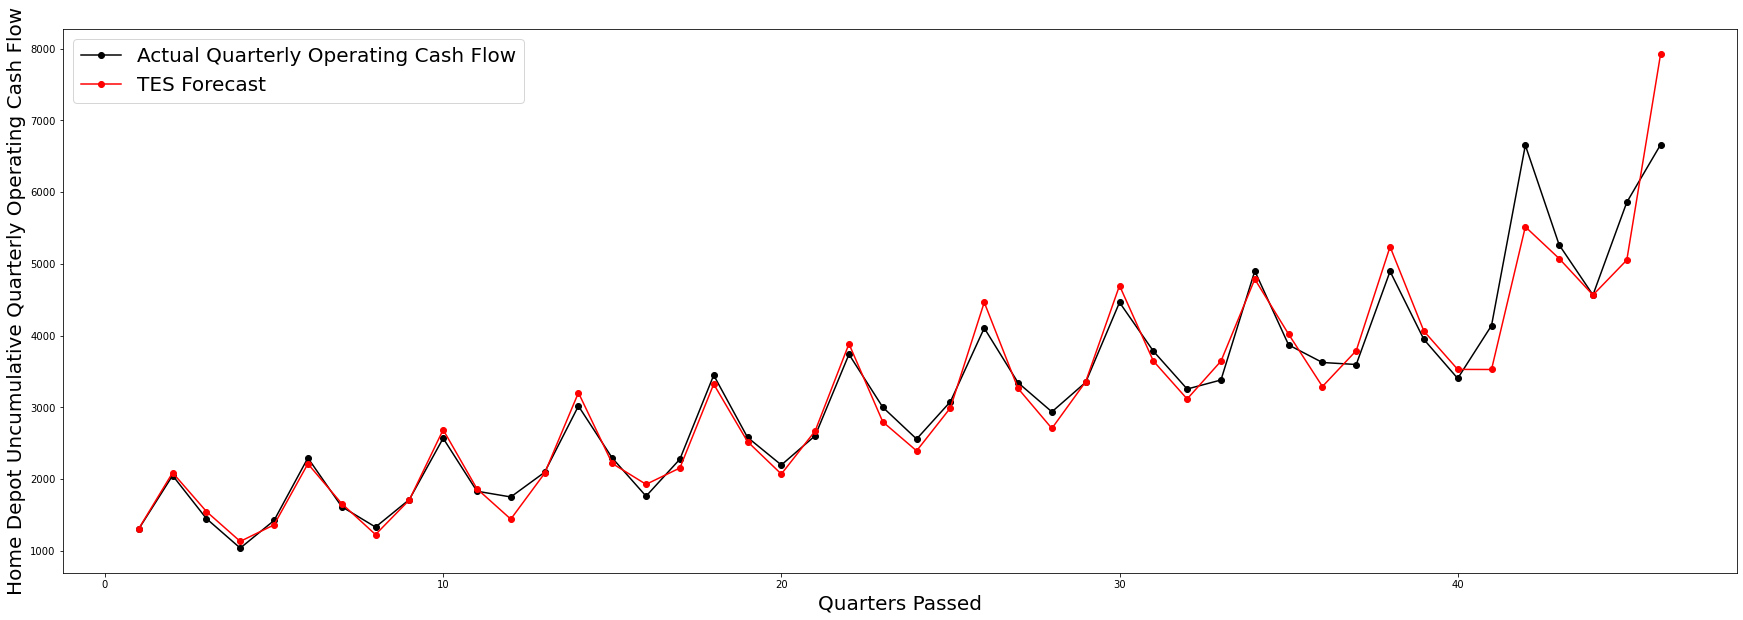

In [21]:
# plot forecasts
plt.figure(figsize=(30, 10))
plt.plot(data4['non_cumulative'], marker='o', color='black', label= 'Actual Quarterly Operating Cash Flow')
plt.plot(data4['tes_forecast'], marker='o', color='red', label= 'TES Forecast')

plt.legend(prop={'size':20})
plt.ylabel('Home Depot Uncumulative Quarterly Operating Cash Flow', size = 20)
plt.xlabel('Quarters Passed', size = 20)

<font color = 'red'> <font size = 4>
**Task 6**
    
</font> </font>

Calculate your insample forecast errors and describe them numerically.

In [22]:
data4['tes_error'] = data4['non_cumulative'] - data4['tes_forecast']
data4.head()

/var/folders/xp/sw_vjs8s7pdcq6bfz9y7pw640000gn/T/ipykernel_23466/748374235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['tes_error'] = data4['non_cumulative'] - data4['tes_forecast']


,gvkey,datadate,fyearq,fqtr,tic,company,datacqtr,datafqtr,netincome_q,pretaxinc_q,...,intl_dom,naics,ipodate,fyear,opercf_annual,operinc_annual,country,non_cumulative,tes_forecast,tes_error
1,5680,2010-04-30,2010,1,HD,HOME DEPOT INC,2010Q1,2010Q1,725.00,"1,116.00",...,B,444110,n,n,NaN,NaN,NaN,"1,305.00","1,308.80",-3.80
2,5680,2010-07-31,2010,2,HD,HOME DEPOT INC,2010Q2,2010Q2,"1,192.00","1,901.00",...,B,444110,n,n,NaN,NaN,NaN,"2,049.00","2,088.31",-39.31
3,5680,2010-10-31,2010,3,HD,HOME DEPOT INC,2010Q3,2010Q3,834.00,"1,306.00",...,B,444110,n,n,NaN,NaN,NaN,"1,448.00","1,547.16",-99.16
4,5680,2011-01-31,2010,4,HD,HOME DEPOT INC,2010Q4,2010Q4,587.00,950.00,...,B,444110,n,2010,"4,585.00","5,839.00",USA,"1,037.00","1,130.24",-93.24
5,5680,2011-04-30,2011,1,HD,HOME DEPOT INC,2011Q1,2011Q1,812.00,"1,283.00",...,B,444110,n,n,NaN,NaN,NaN,"1,422.00","1,361.21",60.79


In [23]:
# keep the columns we need and see how many insampe and outsample error there is
data4 = data4[['non_cumulative', 'tes_forecast', 'tes_error']]
data4

,non_cumulative,tes_forecast,tes_error
1,"1,305.00","1,308.80",-3.80
2,"2,049.00","2,088.31",-39.31
3,"1,448.00","1,547.16",-99.16
4,"1,037.00","1,130.24",-93.24
5,"1,422.00","1,361.21",60.79
6,"2,294.00","2,212.80",81.20
7,"1,615.00","1,657.67",-42.67
8,"1,330.00","1,225.62",104.38
9,"1,714.00","1,708.05",5.95
10,"2,569.00","2,687.79",-118.79


In [24]:
data4[['non_cumulative', 'tes_forecast', 'tes_error']].describe()

,non_cumulative,tes_forecast,tes_error
count,46.00,46.00,46.00
mean,"3,152.52","3,124.90",27.63
std,"1,372.52","1,395.14",332.49
min,"1,037.00","1,130.24","-1,265.01"
25%,"2,119.50","2,081.63",-118.09
50%,"3,048.50","3,054.43",10.27
75%,"3,848.50","3,861.14",125.97
max,"6,663.00","7,928.01","1,136.85"


<font color = 'red'> <font size = 4>
**Task 7**
    
</font> </font>

Simulate 1000 forecast errors for each quarter that we forecasted (both in and out of sample). Use this simulation to create a 95% confidence interval around your forecast.

In [25]:
# Simulate 1000 forecast errors 
# total of 50 periods (46 from insample, 4 from outsample)
simulated_errors = np.random.normal(loc= data4['tes_error'].mean(), scale = np.std(data4['tes_error']) , size = (1000, 50))
# turn the results into a pandas dataframe
simulated_errors = pd.DataFrame(simulated_errors)

#view the results
simulated_errors

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,53.35,-238.04,-802.51,258.13,34.08,24.64,-0.12,-120.38,114.93,-310.84,...,-460.41,-494.93,-1.67,79.43,-157.10,771.30,-45.27,526.03,770.52,-42.61
1,-178.64,153.50,-23.93,265.03,-252.96,-127.22,56.88,-287.16,-462.52,333.75,...,624.58,609.27,104.21,-600.67,-318.66,-444.12,-463.93,-297.01,76.44,26.00
2,-341.80,-305.89,346.92,-379.70,-436.54,-405.87,-593.04,-291.81,352.70,361.11,...,-290.40,361.38,-390.23,794.65,-236.06,294.76,-28.94,-35.77,365.67,520.56
3,418.75,-69.10,2.75,53.61,41.01,25.84,-201.81,-36.72,-174.77,479.22,...,270.48,65.86,367.07,287.69,630.16,-252.73,332.30,425.95,156.85,-361.04
4,712.67,217.78,-360.67,-505.56,151.50,158.23,-667.75,-272.56,99.18,-725.59,...,349.53,-391.51,-101.89,415.09,-135.84,596.78,126.04,313.67,328.36,-831.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,121.73,333.52,506.40,206.89,-13.39,-381.74,56.89,-226.71,30.13,140.32,...,152.68,433.83,-284.35,-316.41,-204.24,191.78,390.29,372.24,428.47,306.03
996,338.16,-362.64,171.72,460.63,-362.76,122.78,-132.94,381.39,190.15,193.14,...,246.71,229.02,-419.19,-66.35,-96.61,-229.32,113.06,159.85,187.72,-29.94
997,-162.00,201.35,104.59,352.91,-344.74,220.48,-412.99,156.05,366.33,-249.37,...,197.79,820.26,-398.74,192.33,-30.04,-190.23,-5.81,-529.63,412.85,-111.38
998,92.74,-333.19,-34.25,696.02,207.58,-776.27,-161.33,-714.02,118.97,-241.87,...,447.87,492.07,102.87,490.58,-63.75,-428.95,-110.43,53.56,69.50,49.47


In [26]:
# turn a 95% confidence interval around your forecast 
upper = .975

lower = .025

In [27]:
# calculate the 97.5 quantile of forecast errors for each period

simulated_errors.quantile(upper, axis = 0)

0    712.74
1    632.86
2    656.54
3    663.01
4    688.52
5    642.80
6    649.88
7    692.28
8    672.40
9    677.86
10   694.97
11   599.31
12   683.66
13   642.05
14   676.82
15   661.02
16   707.96
17   619.64
18   649.41
19   692.29
20   672.95
21   653.85
22   674.53
23   665.86
24   643.16
25   648.75
26   650.75
27   655.50
28   633.16
29   704.54
30   685.98
31   671.60
32   649.58
33   653.61
34   686.57
35   675.92
36   652.76
37   694.49
38   667.00
39   706.75
40   713.23
41   663.20
42   671.45
43   683.59
44   666.34
45   697.06
46   659.48
47   640.73
48   701.65
49   686.51
Name: 0.975, dtype: float64

In [28]:
# the above values are the upper end of our forecast error confidence interval

data4['upper_level'] = simulated_errors.quantile(upper, axis = 0)

data4.head()

,non_cumulative,tes_forecast,tes_error,upper_level
1,"1,305.00","1,308.80",-3.80,632.86
2,"2,049.00","2,088.31",-39.31,656.54
3,"1,448.00","1,547.16",-99.16,663.01
4,"1,037.00","1,130.24",-93.24,688.52
5,"1,422.00","1,361.21",60.79,642.80


In [29]:
# Calculate lower end of our forecast error confidence interval

data4['lower_level'] = simulated_errors.quantile(lower, axis = 0)

data4.tail()

# we are 95% confident that our actual error is 639 below and 659 above our forecast

,non_cumulative,tes_forecast,tes_error,upper_level,lower_level
42,"6,654.00","5,517.15","1,136.85",671.45,-578.71
43,"5,265.00","5,074.45",190.55,683.59,-626.00
44,"4,567.00","4,566.00",1.00,666.34,-589.05
45,"5,859.00","5,053.33",805.67,697.06,-613.05
46,"6,663.00","7,928.01","-1,265.01",659.48,-639.31


In [30]:
# demand - forecast = error
# error + forecast = demand

data4['simulation_upper'] = data4['tes_forecast'] + data4['upper_level']
# already a negative, so add
data4['simulation_lower'] = data4['tes_forecast'] + data4['upper_level']

data4.tail()

,non_cumulative,tes_forecast,tes_error,upper_level,lower_level,simulation_upper,simulation_lower
42,"6,654.00","5,517.15","1,136.85",671.45,-578.71,"6,188.60","6,188.60"
43,"5,265.00","5,074.45",190.55,683.59,-626.00,"5,758.05","5,758.05"
44,"4,567.00","4,566.00",1.00,666.34,-589.05,"5,232.34","5,232.34"
45,"5,859.00","5,053.33",805.67,697.06,-613.05,"5,750.39","5,750.39"
46,"6,663.00","7,928.01","-1,265.01",659.48,-639.31,"8,587.49","8,587.49"


<font color = 'red'> <font size = 4>
**Task 8**
    
</font> </font>

Recreate your plot from Task 4. Add a 95% confidence interval as a '-.' line.

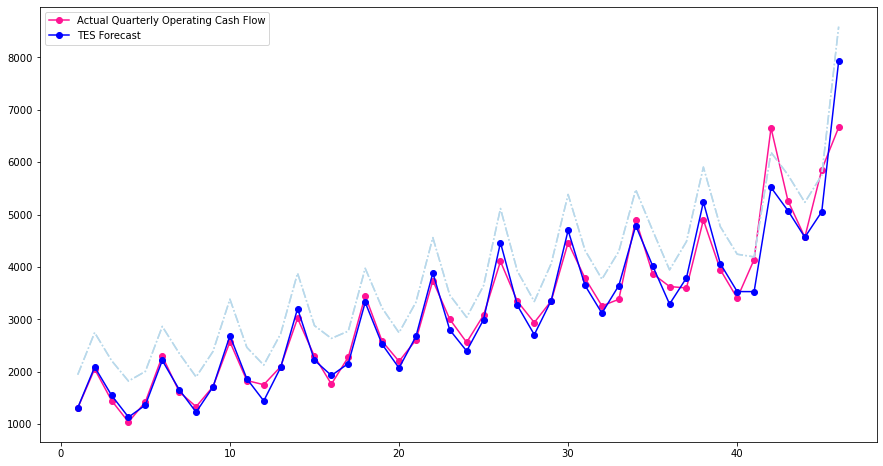

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(data4['non_cumulative'], marker='o', color='deeppink', label='Actual Quarterly Operating Cash Flow')
plt.plot(data4['tes_forecast'], marker='o', color='blue', label = 'TES Forecast')
plt.plot(data4['simulation_upper'], color='#B9D9EB', linestyle = '-.')
plt.plot(data4['simulation_lower'], color= '#B9D9EB', linestyle = '-.')
plt.legend()

<font color = 'blue'> <font size = 4>
**Question 5**
    
</font> </font>

Explain your results. Use home Depot's 10-Ks to provide context.

Home Depot's actual quarterly operating cash flow in general seems have higher forecast probability, given the 95% confidence interval, than it's actual values. This indicates that Home Depot's 10-k reports that Home depot's products weren't meeting the demands and preferneces of the customers, except the quarterly operating cash flow forecast in 2021 quarter 2 being smaller than the actual values. Given the fact that this plot includes the 95% confidence interval while minimizing as much as forecast errors as possible, we predict that Home Depot's 10-k would report actual operating cash flows will be lower in the future. We can assume that this trend ties in with Home Depot being classified as less performing compared to similar industry boundaries and competition such as Ace Hardware.